# Test Multi Spectral Images

### MRobalinho  20-4-2019

https://www.rapidtables.com/web/color/html-color-codes.html


In [3]:
# Add libraries
import glob, os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Verify my current folder
currDir = os.path.dirname(os.path.realpath("__file__"))
mypath = currDir
print(currDir) 

C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook


In [5]:
# Path to the image files
folder = "Test_image02"
path = mypath + "/" + folder + "/"
path

'C:\\Users\\manuel.robalinho\\Google Drive\\UPT_Portucalense\\Trabalho final\\Classificacao_Sucata\\Jupyter_Notebook/Test_image02/'

In [13]:
xfile = 'White_Mask_Copper_3.jpg'

### Remove bakground

In [8]:
# https://stackoverflow.com/questions/21217384/remove-background-colour-from-image-using-python-pil
    
import numpy as np
from PIL import Image

im = Image.open(path+xfile)
im = im.convert('RGBA')
data = np.array(im)
# just use the rgb values for comparison
rgb = data[:,:,:3]
color = [246, 213, 139]   # Original value
black = [0,0,0, 255]
white = [255,255,255,255]
mask = np.all(rgb == color, axis = -1)
# change all pixels that match color to white
data[mask] = white

# change all pixels that don't match color to black
##data[np.logical_not(mask)] = black
new_im = Image.fromarray(data)
new_im.save('new_file.tif')

### Remove background of any image using opencv

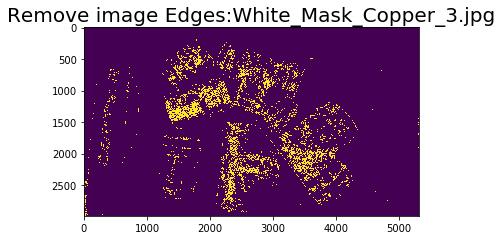

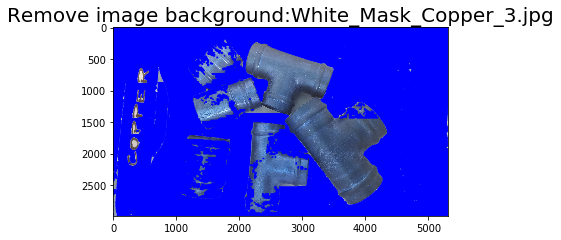

In [14]:
# https://stackoverflow.com/questions/49093729/remove-background-of-any-image-using-opencv

import cv2
import numpy as np

#== Parameters           
BLUR = 21
CANNY_THRESH_1 = 10
CANNY_THRESH_2 = 100  # Original 200, changed to 100
MASK_DILATE_ITER = 10
MASK_ERODE_ITER = 10
MASK_COLOR = (0.0,0.0,1.0) # In BGR format

#-- Read image
img = cv2.imread(path+xfile)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#-- Edge detection 
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

#-- Find contours in edges, sort by area 
contour_info = []
_, contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for c in contours:
    contour_info.append((
        c,
        cv2.isContourConvex(c),
        cv2.contourArea(c),
    ))
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
max_contour = contour_info[0]

#-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
# Mask is black, polygon is white
mask = np.zeros(edges.shape)
for c in contour_info:
    cv2.fillConvexPoly(mask, c[0], (255))
    
#-- Smooth mask, then blur it
mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

#-- Blend masked img into MASK_COLOR background
mask_stack  = mask_stack.astype('float32') / 255.0         
img         = img.astype('float32') / 255.0    
masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR)  
masked = (masked * 255).astype('uint8')                    

#cv2.imshow('img', masked)                                   # Display
#cv2.waitKey()
cv2.imwrite("CV2_WTF.jpg",masked)
##
# show on screen (optional in jupiter)
plt.imshow(edges)
plt.title('Remove image Edges:'+xfile,fontsize=20)
plt.show()

%matplotlib inline
plt.imshow(masked)
plt.title('Remove image background:'+xfile,fontsize=20)
plt.show()

